<a href="https://colab.research.google.com/github/aditish30/HOTEL-BOOKING-ANALYSIS/blob/main/Hotel_booking_analysis_(Team).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The given data set contains booking information for a city hotel and resort hotel, and it has information such as when the booking was made, length of stay, the number of adults, children, and babies, and the number of available parking spaces, among other things.**

**All personally identifying information has been removed from the data.**

**Explore and analyze the data to discover important factors that govern the bookings.**

In [87]:
# lets import the libraries required for data analysing

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [88]:
# lets import the data by mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# read the csv file

file_path = "/content/drive/MyDrive/EDA Collab_project/Copy of Hotel Bookings.csv"
hotel_booking_analysis_data = pd.read_csv(file_path)

In [90]:
# to get the top 5 rows from the imported data

hotel_booking_analysis_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [91]:
hotel_booking_analysis_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [92]:
hotel_booking_analysis_data.shape

(119390, 32)

From the data we have 119390 rows and 32 columns

In [93]:
# lets analyze the data basically

hotel_booking_analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Data Processing**

Create a copy of the given dataset, so that our original dataset remains unchanged

In [94]:
# creating the copy of the given data

df = hotel_booking_analysis_data.copy()

In [95]:
# to find the sum of null rows 

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Data cleaning and handling of missing values**

Lets find the percentage of null values present in the dataset

In [96]:
# Create a function to find percentage of null values present

def percent_missing(df):
    percent_nan = df.isnull().sum() / len(df) * 100
    percent_nan = percent_nan[percent_nan>0].sort_values(ascending = False)
    return percent_nan 

In [97]:
percent_nan = percent_missing(df)
percent_nan

company     94.306893
agent       13.686238
country      0.408744
children     0.003350
dtype: float64

Text(0.5, 0, 'Null value Columns')

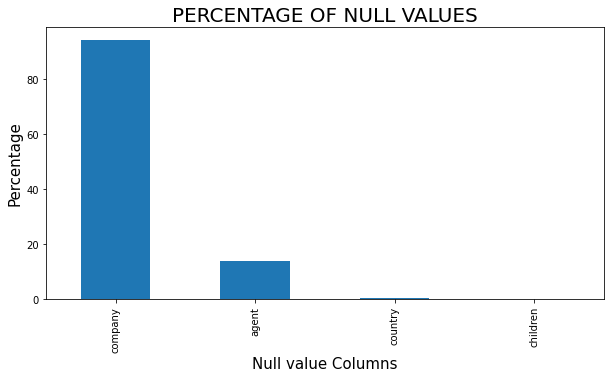

In [98]:
x = percent_nan.plot(figsize = (10,5) , kind = "bar")
plt.title('PERCENTAGE OF NULL VALUES' , fontsize = 20)
plt.ylabel('Percentage' , fontsize = 15)
plt.xlabel('Null value Columns' , fontsize = 15)

**Inference :** Clearly from the graph company column has got 94% and agent column has got 13% of null values where country and children columns has got less than 1%.

Since the company column has got 94% of the null values it is better to drop out this column

In [99]:
df.drop(["company"] ,axis = 1, inplace = True)

In [100]:
df.shape

(119390, 31)

We will fill the agent id with "Agent" and null agent id with "No Agent"

In [101]:
# First we will fill the agent ids with 'Agent'

df.loc[df.agent.isnull()==False,'agent']='Agent'

In [102]:
# Now we will fill the null values present in agent ids with 'No agent'

df.agent.fillna('No agent',inplace=True)

In [103]:
df[["agent"]].head()

,agent
0,No agent
1,No agent
2,No agent
3,Agent
4,Agent


We would fill the missing values in the country coulumns with 'Unknown' since we do not seem to find any references to other columns

In [104]:
df.country.fillna('Unknown',inplace=True)

In [105]:
df["country"]

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

We would fill the missing values in the children column with 0

In [106]:
df.children.fillna(0,inplace=True)

In [107]:
df["children"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 119390, dtype: float64

In [108]:
# lets check again if we have any nulls present in our dataset

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Remove the duplicate data if present

In [109]:
# checking for duplicate data
df.duplicated().sum()

32014

In [110]:
# removing the duplicate data
df.drop_duplicates(inplace = True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87376 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87376 non-null  object 
 1   is_canceled                     87376 non-null  int64  
 2   lead_time                       87376 non-null  int64  
 3   arrival_date_year               87376 non-null  int64  
 4   arrival_date_month              87376 non-null  object 
 5   arrival_date_week_number        87376 non-null  int64  
 6   arrival_date_day_of_month       87376 non-null  int64  
 7   stays_in_weekend_nights         87376 non-null  int64  
 8   stays_in_week_nights            87376 non-null  int64  
 9   adults                          87376 non-null  int64  
 10  children                        87376 non-null  float64
 11  babies                          87376 non-null  int64  
 12  meal                           

Lets find the categorical features with their unique values 

In [112]:
#Check the categorical features with their unique values

categorical_features = ['hotel', 'is_canceled', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type',
'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']

print(f"Unique values by features \n")

for feature in categorical_features: 
  unique_values = df[feature].unique() 
  print(f"{feature}:\n {unique_values}\n")

Unique values by features 

hotel:
 ['Resort Hotel' 'City Hotel']

is_canceled:
 [0 1]

meal:
 ['BB' 'FB' 'HB' 'SC' 'Undefined']

country:
 ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'Unknown' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP'
 'BDI' 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL'
 'UZB' 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND'
 'RWA' 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA'

#**Performing EDA**

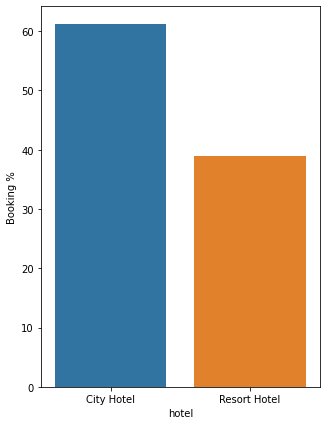

In [113]:
grouped_by_hotel = df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (5,7))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()


Canceled bookings

Text(0.5, 1.0, 'Cancellation rates in city and resort hotel')

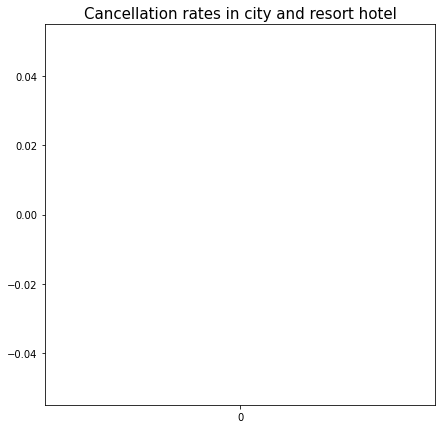

In [114]:
l1 = ['is_canceled', 'hotel']
type_of_hotel_canceled = df[l1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name = 'count')
plt.figure(figsize=(7,7))
sns.barplot().set_title('Cancellation rates in city and resort hotel',fontsize=15)


We have seen a huge proportion of cancellation from city hotel. This was expected since 3/4 of the hotel bookings belong to city hotels.

arrivbal period

Text(0.5, 1.0, 'Number of arrival per Year')

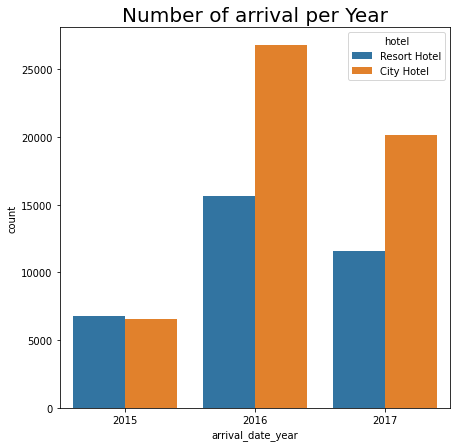

In [115]:
l2 = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_arrival = df[l2]
plt.figure(figsize=(7,7))
sns.countplot(data = period_arrival, x = 'arrival_date_year', hue = 'hotel').set_title('Number of arrival per Year',fontsize=20)


Text(0, 0.5, 'Count')

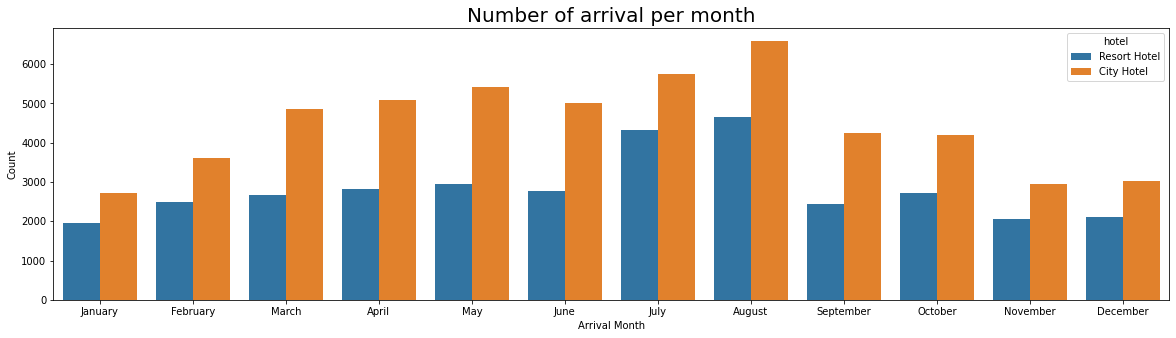

In [116]:
plt.figure(figsize=(20,5))

sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Number of arrival per month',fontsize=20)
plt.xlabel('Arrival Month')
plt.ylabel('Count')


Text(0.5, 1.0, 'Number of arrival per day')

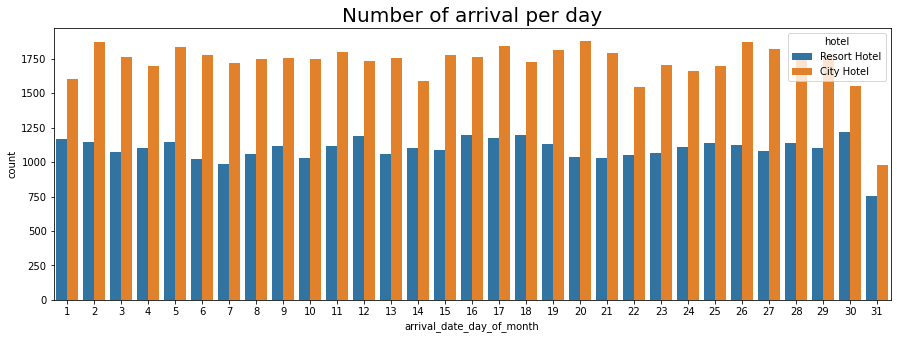

In [117]:
plt.figure(figsize=(15,5))
sns.countplot(data = period_arrival, x = 'arrival_date_day_of_month', hue = 'hotel').set_title('Number of arrival per day', fontsize = 20)


*   We can see that 2016 seems to be the year where hotel booking is at its highest.
*   We also see an increasing trend in booking around the middle of the year, with August being the highest.






market segment and distribution channel

Text(0.5, 1.0, 'Types of market segment')

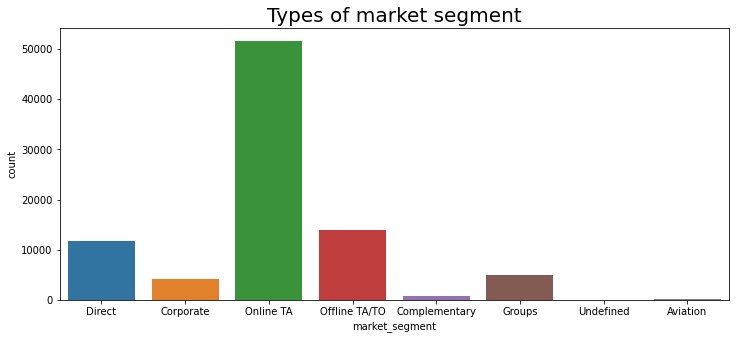

In [118]:
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'market_segment').set_title('Types of market segment', fontsize = 20)

Text(0.5, 1.0, 'Types of distribution channel')

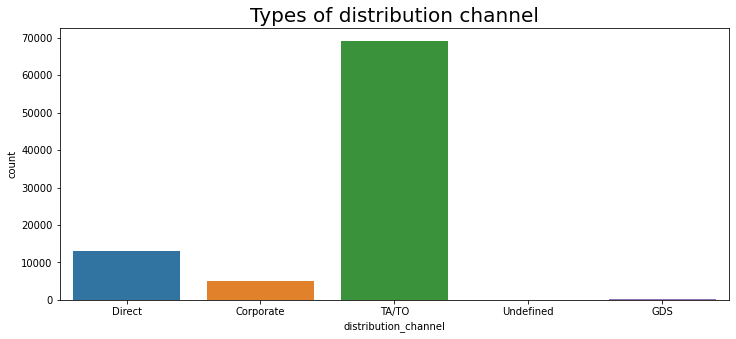

In [119]:
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'distribution_channel').set_title('Types of distribution channel', fontsize = 20)

*  Majority of the distribution channels and market segments involve travel agencies.
*   We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them.




stay in weekend or week days

Text(0.5, 1.0, 'Number of stays on weekend nights')

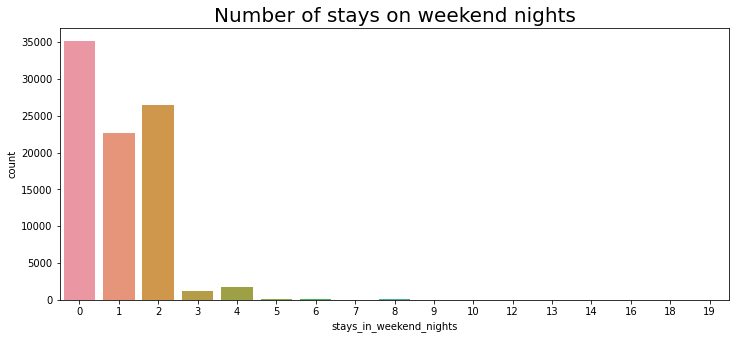

In [120]:
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 20)

Text(0.5, 1.0, 'Number of stays on weekday night')

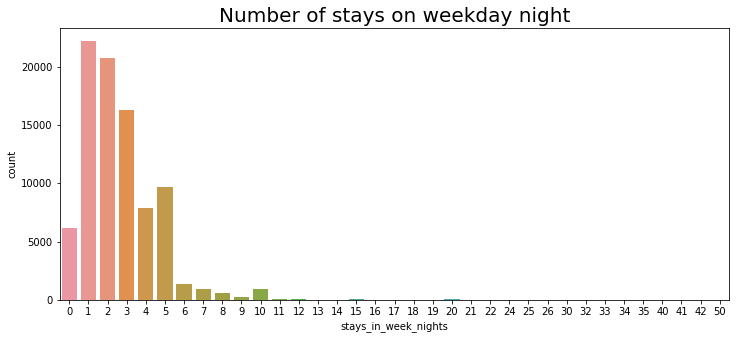

In [121]:
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'stays_in_week_nights' ).set_title('Number of stays on weekday night' , fontsize = 20)

Meals

In [122]:
# categories of meal feature  we have in our data
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

**People at each hotel can choose from four categories of meals which they can book their respective stays with, let's briefly see what those are**

*   Undefined/SC – no meal package
*   BB – Bed & Breakfast
*   HB – Half board (breakfast and one other meal – usually dinner)
*   FB – Full board (breakfast, lunch and dinner)






In [123]:
# Group them according to City and Resort Hotels
meal_category = df.groupby(['hotel'])['meal'].value_counts()
meal_category

hotel         meal     
City Hotel    BB           41220
              SC            9396
              HB            2791
              FB              11
Resort Hotel  BB           26742
              HB            6292
              Undefined      492
              FB             348
              SC              84
Name: meal, dtype: int64

Text(0.5, 1.0, 'Meals opted for in the two hotels')

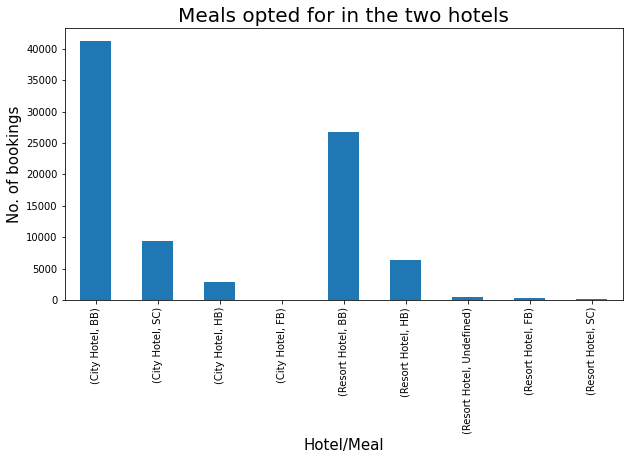

In [124]:
plt.rcParams['figure.figsize'] = (10,5)
meal_category.plot(kind= 'bar')

plt.ylabel('No. of bookings',fontsize = 15)
plt.xlabel('Hotel/Meal',fontsize = 15)
plt.title('Meals opted for in the two hotels',fontsize = 20)


We have made you life really easy by creating the above chart, let me explain how. We have each hotel with respective food categories and the number of booking that people are doing in each hotel with each meal category, now it should not take you much long to figure out that be it Resort Hotel or city Hotel, people mostly prefer to go with the BB-category which is nothing more than bread and breakfast!

Adr

Text(0.5, 1.0, 'Average Daily Rate(ADR) Per Person')

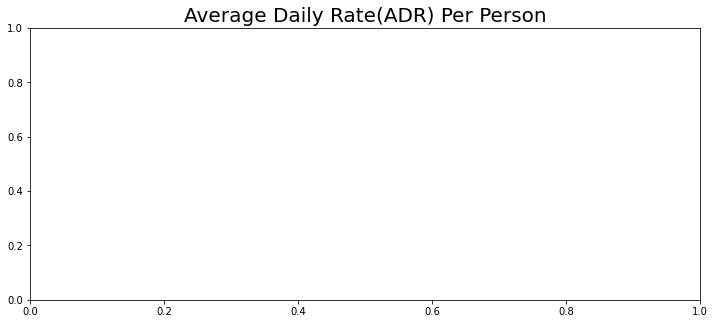

In [125]:
plt.figure(figsize=(12,5))

# Calculating average daily rate per person

df['adr_per_person'] = df['adr'] / (df['adults'] + df['children']) 
actual_guests = df.loc[df["is_canceled"] == 'not_canceled']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])

sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel').set_title('Average Daily Rate(ADR) Per Person' , fontsize = 20)


*   Prices of resort hotel are much higher. It seems that that is 
definitely the case since resort hotels specialise in that
*   Prices of city hotel do not fluctuate that much.

